In [1]:
import pyspark
sc = pyspark.SparkContext()

In [2]:
from pyspark.sql import SQLContext
sql = SQLContext(sc)

In [3]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel

In [3]:
df0 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00000-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [4]:
df1 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00001-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [5]:
df2 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00002-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [6]:
df3 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00003-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [7]:
df4 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00004-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [8]:
df5 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00005-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [9]:
df6 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00006-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [10]:
df7 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00007-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [11]:
#Joining two dataframes row wise
df0 = df0.union(df1)

In [14]:
df0 = df0.union(df2)

In [16]:
df0 = df0.union(df3)

In [19]:
df0 = df0.union(df4)

In [22]:
df0 = df0.union(df5)

In [25]:
df0 = df0.union(df6)

In [28]:
df0 = df0.union(df7)

In [30]:
df0.printSchema()

root
 |-- CASE_STATUS: string (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: string (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SOC_NAME_CONVERTED: string (nullable = true)



In [31]:
df0 = df0.withColumn("PREVAILING_WAGE", df0["PREVAILING_WAGE"].cast("double"))

In [32]:
df0.printSchema()

root
 |-- CASE_STATUS: string (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: double (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SOC_NAME_CONVERTED: string (nullable = true)



In [ ]:
gdf0 = df0.groupby('STATE').count()
gdf1 = df0.groupby('CASE_STATUS').count()
gdf2 = df0.groupby('FULL_TIME_POSITION').count()
gdf3 = df0.groupby('YEAR').count()
gdf4 = df0.groupby('SOC_NAME_CONVERTED').count()

In [ ]:
gdf0.show(53)

In [ ]:
gdf0.write \
    .format('csv') \
    .option("header","true")\
    .save('Num_Applns_By_State.csv')

In [ ]:
from pyspark.sql.functions import col, avg
df_AvgWage_State = df0.groupby('STATE').agg(avg(col("PREVAILING_WAGE")))

In [33]:
newdf1 = df0.filter(df0["CASE_STATUS"]!='DENIED')

In [35]:
newdf2 = df0.filter(df0["CASE_STATUS"]=='DENIED')

In [37]:
from pyspark.sql.functions import lit

newdf1 = newdf1.withColumn('TARGET', lit(0))
newdf2 = newdf2.withColumn('TARGET', lit(1))

In [38]:
newdf1 = newdf1.union(newdf2)

In [40]:
newdf1.printSchema()

root
 |-- CASE_STATUS: string (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: double (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SOC_NAME_CONVERTED: string (nullable = true)
 |-- TARGET: integer (nullable = false)



In [41]:
#Dropping column from dataframe
newdf1 = newdf1.drop("CASE_STATUS")

In [ ]:
newdf1 = newdf1.withColumn("TARGET", newdf1["TARGET"].cast("string"))

In [42]:
newdf1 = newdf1.drop("CITY")

In [43]:
newdf1.show()

+------------------+---------------+----+--------------------+------------------+------+
|FULL_TIME_POSITION|PREVAILING_WAGE|YEAR|               STATE|SOC_NAME_CONVERTED|TARGET|
+------------------+---------------+----+--------------------+------------------+------+
|                 Y|       132475.0|2016|            NEW YORK|                 1|     0|
|                 Y|       114483.0|2016|            NEW YORK|                 1|     0|
|                 Y|       111654.0|2016|               TEXAS|                 1|     0|
|                 Y|        90000.0|2016|          CALIFORNIA|                 1|     0|
|                 Y|       106900.0|2016|            VIRGINIA|                 1|     0|
|                 Y|       115600.0|2016|          CALIFORNIA|                 1|     0|
|                 Y|       127358.0|2016|            NEW YORK|                 1|     0|
|                 Y|       186098.0|2016|            NEW YORK|                 1|     0|
|                 Y| 

In [44]:
cols = newdf1.columns

In [46]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [47]:
categoricalColumns = ["FULL_TIME_POSITION", "YEAR", "STATE", "SOC_NAME_CONVERTED"]

In [51]:
stages = []

In [53]:
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol+"Index")
    encoder = OneHotEncoder(inputCol=stringIndexer.getOutputCol(), outputCol=categoricalCol+"classVec")
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = "TARGET", outputCol = "label")
stages += [label_stringIdx]

numericCols = ["PREVAILING_WAGE"]
newcatcol = []

In [54]:
for categoricalCol in categoricalColumns:
     newcatcol.append(categoricalCol + "classVec")
assemblerInputs = newcatcol + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(newdf1)
df = pipelineModel.transform(newdf1)

selectedcols = ["label", "features"]+cols
df = df.select(selectedcols)
display(df)

DataFrame[label: double, features: vector, FULL_TIME_POSITION: string, PREVAILING_WAGE: double, YEAR: string, STATE: string, SOC_NAME_CONVERTED: string, TARGET: int]

In [55]:
df.show()

+-----+--------------------+------------------+---------------+----+--------------------+------------------+------+
|label|            features|FULL_TIME_POSITION|PREVAILING_WAGE|YEAR|               STATE|SOC_NAME_CONVERTED|TARGET|
+-----+--------------------+------------------+---------------+----+--------------------+------------------+------+
|  0.0|(60,[0,1,8,59],[1...|                 Y|       132475.0|2016|            NEW YORK|                 1|     0|
|  0.0|(60,[0,1,8,59],[1...|                 Y|       114483.0|2016|            NEW YORK|                 1|     0|
|  0.0|(60,[0,1,7,59],[1...|                 Y|       111654.0|2016|               TEXAS|                 1|     0|
|  0.0|(60,[0,1,6,59],[1...|                 Y|        90000.0|2016|          CALIFORNIA|                 1|     0|
|  0.0|(60,[0,1,16,59],[...|                 Y|       106900.0|2016|            VIRGINIA|                 1|     0|
|  0.0|(60,[0,1,6,59],[1...|                 Y|       115600.0|2016|    

In [142]:
(subset80PctData, restData) = df.randomSplit([0.8, 0.2], seed = 100)
print(subset80PctData.count())

2330465


In [161]:
(trainingData, testData) = df.randomSplit([0.7, 0.3], seed = 100)
print(trainingData.count())

2038365


In [162]:
print(testData.count())

874170


In [163]:
from pyspark.ml.classification import LogisticRegression

In [164]:
import time

In [165]:
start_time = time.time()
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)
print("---%s seconds----"%(time.time()-start_time))

---19.05342435836792 seconds----


In [166]:
predictions.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: double (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- SOC_NAME_CONVERTED: string (nullable = true)
 |-- TARGET: integer (nullable = false)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [167]:
selected = predictions.select("label", "prediction", "probability", "STATE", "TARGET", "YEAR")

In [170]:
selected.show()

+-----+----------+--------------------+----------+------+----+
|label|prediction|         probability|     STATE|TARGET|YEAR|
+-----+----------+--------------------+----------+------+----+
|  0.0|       0.0|[0.99381590382328...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381590382328...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381590382328...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381590382328...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381571756479...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381567324183...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381566268870...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381566268870...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381566268870...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381566268870...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381566268870...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381566268870...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.99381566268870...|CALIFORNIA|     

In [171]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.7244280925184863

In [115]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
results = predictions.select(['probability', 'label'])

In [155]:
results_collect = results.collect()

In [156]:
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]

In [157]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [158]:
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

In [159]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

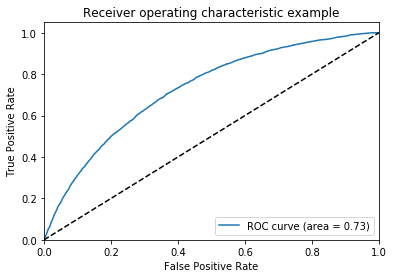

In [160]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()